# Exploring Pipelines in pbsmrtpipe

In [1]:
import re
import logging
import datetime

import pbcommand
import pbsmrtpipe
import pbsmrtpipe.graph.bgraph as B
import pbsmrtpipe.graph.bgraph_utils as BU
import pbsmrtpipe.loader as L
import pbsmrtpipe.toolbook as TB

log = logging.getLogger(__name__)
print "pbcommand {}".format(pbcommand.get_version())
print "pbsmrtpipe {}".format(pbsmrtpipe.get_version())
print datetime.datetime.now()

pbcommand 0.4.6
pbsmrtpipe 0.43.2
2016-08-23 08:40:58.147019


## Load Pipeline Resources

- Tasks (i.e., tool contracts)
- Registered file types (see pbcommand.common.FileTypes)
- Chunk Operators
- Registered Pipelines

In [4]:
rtasks, rfile_types, chunk_operators, pipelines_d = L.load_all()

## Loaded Pipelines

In [5]:
print "Loaded {} pipelines".format(len(pipelines_d))
pipelines_d.keys()[:10]

Loaded 58 pipelines


['pbsmrtpipe.pipelines.pb_isoseq_classify',
 'pbsmrtpipe.pipelines.internal_cond_dev',
 'pbsmrtpipe.pipelines.pb_isoseq',
 'pbsmrtpipe.pipelines.pipe_falcon',
 'pbsmrtpipe.pipelines.sa3_ds_resequencing',
 'pbsmrtpipe.pipelines.hgap_fat',
 'pbsmrtpipe.pipelines.sa3_fetch',
 'pbsmrtpipe.pipelines.sa3_ds_barcode_ccs',
 'pbsmrtpipe.pipelines.dev_01_fail',
 'pbsmrtpipe.pipelines.pb_modification_detection']

# Show Summary of Specific Pipeline

In [6]:
pipeline = pipelines_d['pbsmrtpipe.pipelines.dev_local_fasta_chunk']

In [7]:
print pipeline.summary()

Pipeline Summary
Pipeline Id          :pbsmrtpipe.pipelines.dev_local_fasta_chunk
EntryPoints          :1
$entry:e_01 -> pbsmrtpipe.tasks.dev_hello_world:0
Bindings             :5
pbsmrtpipe.tasks.dev_hello_garfield:0 -> pbsmrtpipe.tasks.dev_txt_to_fasta:0
pbsmrtpipe.tasks.dev_hello_world:0 -> pbsmrtpipe.tasks.dev_hello_worlder:0
pbsmrtpipe.tasks.dev_hello_worlder:0 -> pbsmrtpipe.tasks.dev_hello_garfield:0
pbsmrtpipe.tasks.dev_filter_fasta:0 -> pbsmrtpipe.tasks.dev_tc_fasta_report:0
pbsmrtpipe.tasks.dev_txt_to_fasta:0 -> pbsmrtpipe.tasks.dev_filter_fasta:0
Parents pipeline ids :['pbsmrtpipe.pipelines.dev_01', 'pbsmrtpipe.pipelines.dev_02', 'pbsmrtpipe.pipelines.dev_03']
Tags                 :['chunking', 'dev'] 


The '$entry:e_01' is the fundamental required entry point (i.e., path to file) to run the pipeline. When the pipeline is called from the commandline, --entry-point 'e_01:/path/to/file.txt` should be supplied.

# Load into BindingGraph to get details of pipeline

In [9]:
bg = B.binding_strs_to_binding_graph(rtasks, pipeline.all_bindings)

In [10]:
dot_str = BU.binding_graph_to_dot(bg)

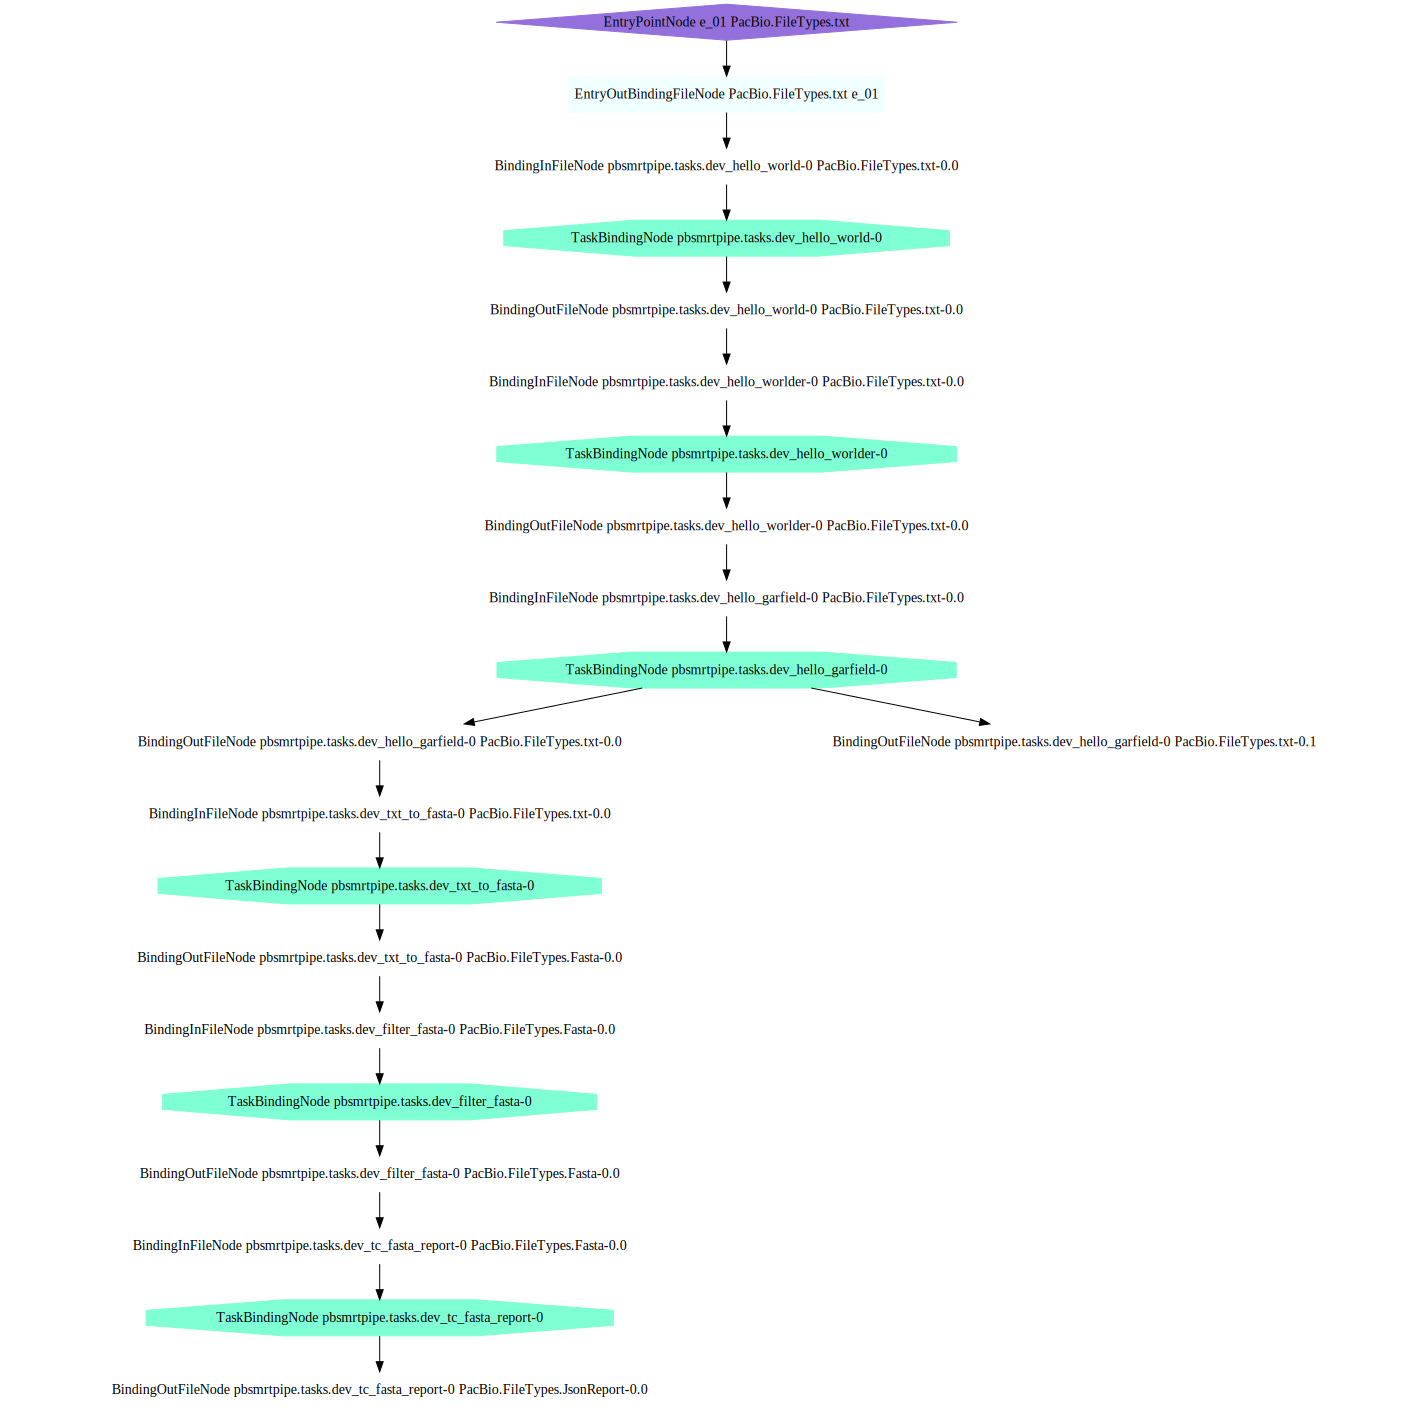

In [11]:
TB.display_dot_str(dot_str)

In [12]:
print BU.to_binding_graph_summary(bg)

********************************************************************************
Binding Graph Status Summary
--------------------------------------------------------------------------------
Workflow complete? False
--------------------------------------------------------------------------------
Task Summary 7 tasks (created:{<TaskBindingNode pbsmrtpipe.tasks.dev_hello_world-0>: 'created', <TaskBindingNode pbsmrtpipe.tasks.dev_txt_to_fasta-0>: 'created', <TaskBindingNode pbsmrtpipe.tasks.dev_hello_garfield-0>: 'created', <EntryPointNode e_01 PacBio.FileTypes.txt>: 'created', <TaskBindingNode pbsmrtpipe.tasks.dev_filter_fasta-0>: 'created', <TaskBindingNode pbsmrtpipe.tasks.dev_tc_fasta_report-0>: 'created', <TaskBindingNode pbsmrtpipe.tasks.dev_hello_worlder-0>: 'created'} successful:{} scattered:{} submitted:{} failed:{} running:{} ready:{} killed:{})
--------------------------------------------------------------------------------
resolved inputs      resolved outputs     state       